

---
INI ADALAH CATATAN PYTHON ISENG
---




In [ ]:
import pandas as pd
import math
import time
import seaborn as sns
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import statistics
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
#Prediksi Harga Rumah
import requests
from contextlib import closing
import csv
# STEP 1:
# Baca file "harga_rumah.txt"
url = "https://storage.googleapis.com/dqlab-dataset/harga_rumah.txt"
data_harga_rumah = []
with closing(requests.get(url, stream=True)) as r:
    f = (line.decode('utf-8') for line in r.iter_lines())
    data_harga_rumah = [row for row in csv.reader(f)]
# Buat list of dict dengan nama harga rumah
key_harga_rumah = data_harga_rumah[0]
harga_rumah = []
for baris_harga_rumah in data_harga_rumah[1:]:
	dict_harga_rumah = dict()
	for i in range(len(baris_harga_rumah)):
		dict_harga_rumah[key_harga_rumah[i]] = baris_harga_rumah[i]
	harga_rumah.append(dict_harga_rumah)
print(harga_rumah)
# STEP 2:
# Buat fungsi  get_all_specified_attribute yang menerima parameter list_of_dictionary
# (tipe data list yang berisikan sekumpulan tipe data dictionary) dan specified_key
# (tipe data string). Fungsi akan mengembalikan sebuah list yang berisikan seluruh
# atribut dengan kunci (key) specified_key.
def get_all_specified_attributes(list_of_dictionary, specified_key):
	list_attributes = []
	for data in list_of_dictionary:
		attribute = data[specified_key]
		list_attributes.append(attribute)
	return list_attributes
# STEP 3:
# Buat fungsi fungsi min_value yang menerima parameter list_attributes (berupa
# tipe data list) dan mengembalikan nilai terkecil dalam list_attributes
def min_value(list_attributes):
	min_attribute = 9999
	for attr in list_attributes:
		if int(attr) < min_attribute:
			min_attribute = int(attr)
	return min_attribute
# Buat fungsi dan max_value yang menerima parameter list_attribute dan
# mengembalikan nilai terbesar dalam list_attributes.
def max_value(list_attributes):
	max_attribute = -9999
	for attr in list_attributes:
		if int(attr) > max_attribute:
			max_attribute = int(attr)
	return max_attribute
# STEP 4:
# Buat fungsi transform_attribute yang menerima parameter attr (sebuah
# bilangan), max_attr (sebuah bilangan) dan min_attr (sebuah bilangan)
# yang mengembalikan nilai transformasi dari sebuah attribute.
def transform_attribute(attr, max_attr, min_attr):
	nilai_transformasi = (attr - min_attr) / (max_attr - min_attr)
	return nilai_transformasi
# STEP 5:
# Buat fungsi data_transformation yang menerima parameter list_of_dictionary
# (sebuah list yang berisikan tipe data dictionary) dan list_attribute_names
# (sebuah list yang berisikan tipe data string) mengembalikan hasil
# transformasi data dari list_of_dictionary berdasarkan list_attribute_names
# dan attr_info telah dispesifikasikan.
def data_transformation(list_of_dictionary, list_attribute_names):
	attr_info = {}
	for attr_name in list_attribute_names:
		specified_attributes = get_all_specified_attributes(list_of_dictionary, attr_name)
		max_attr = max_value(specified_attributes)
		min_attr = min_value(specified_attributes)
		attr_info[attr_name] = {'max': max_attr, 'min': min_attr}
		data_idx = 0
		while(data_idx < len(list_of_dictionary)):
			list_of_dictionary[data_idx][attr_name] = transform_attribute(int(list_of_dictionary[data_idx][attr_name]), max_attr, min_attr)
			data_idx += 1
	return list_of_dictionary, attr_info
# STEP 6:
# Berdasarkan data baru dan attr_info ini, buat fungsi transform_data yang
# menerima parameter data dan attr_info dan mengembalikan nilai atribut
# dari data baru yang telah ditransformasikan.
def transform_data(data, attr_info):
	for key_name in data.keys():
		data[key_name] = (data[key_name] - attr_info[key_name]['min']) / (
		                  attr_info[key_name]['max'] - attr_info[key_name]['min'])
	return data
# STEP 7:
# Buat fungsi yang digunakan untuk sistem prediksi harga berdasarkan
# nilai kemiripan atribut!
def abs_value(value):
	if value < 0:
		return -value
	else:
		return value
def price_based_on_similarity(data, list_of_data):
	prediksi_harga = 0
	perbedaan_terkecil = 999
	for data_point in list_of_data:
		perbedaan= abs_value(data['tanah'] - data_point['tanah'])
		perbedaan+= abs_value(data['bangunan'] - data_point['bangunan'])
		perbedaan+= abs_value(data['jarak_ke_pusat'] - data_point['jarak_ke_pusat'])
		if perbedaan < perbedaan_terkecil:
			prediksi_harga = data_point['harga']
			perbedaan_terkecil = perbedaan
	return prediksi_harga
# STEP 8:
# Hitung harga rumah yang telah ditransformasikan ke dalam variabel
# harga_rumah berikut dengan atributnya attr_info
harga_rumah, attr_info = data_transformation(harga_rumah,
                                             ['tanah','bangunan','jarak_ke_pusat'])
# Gunakan variabel data untuk memprediksi harga rumah
data = {'tanah': 110, 'bangunan': 80, 'jarak_ke_pusat': 35}
# Transformasikan data tersebut dengan dengan menggunakan attr_info yang telah
# diperoleh yang kembali disimpan ke variabel data.
data = transform_data(data, attr_info)
# Hitunglah prediksi harga dari variabel data tersebut.
harga = price_based_on_similarity(data, harga_rumah)
print("Prediksi harga rumah: ", harga)

[{'tanah': '70', 'bangunan': '50', 'jarak_ke_pusat': '15', 'harga': '500'}, {'tanah': '70', 'bangunan': '60', 'jarak_ke_pusat': '30', 'harga': '400'}, {'tanah': '70', 'bangunan': '60', 'jarak_ke_pusat': '55', 'harga': '300'}, {'tanah': '100', 'bangunan': '50', 'jarak_ke_pusat': '30', 'harga': '700'}, {'tanah': '100', 'bangunan': '70', 'jarak_ke_pusat': '25', 'harga': '1000'}, {'tanah': '100', 'bangunan': '70', 'jarak_ke_pusat': '50', 'harga': '650'}, {'tanah': '120', 'bangunan': '100', 'jarak_ke_pusat': '20', 'harga': '2000'}, {'tanah': '120', 'bangunan': '80', 'jarak_ke_pusat': '50', 'harga': '1200'}, {'tanah': '150', 'bangunan': '100', 'jarak_ke_pusat': '50', 'harga': '1800'}, {'tanah': '150', 'bangunan': '90', 'jarak_ke_pusat': '15', 'harga': '3000'}]
Prediksi harga rumah:  1200


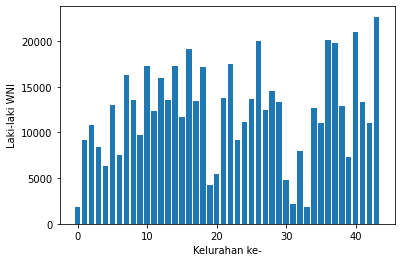

In [ ]:
#BARPLOT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

table = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/penduduk_gender_head.csv")
table.head()
x_label = table['NAMA KELURAHAN']
plt.bar(x = np.arange(len(x_label)),height = table['LAKI-LAKI WNI'])
plt.xlabel("Kelurahan ke-")
plt.ylabel("Laki-laki WNI")
plt.show()

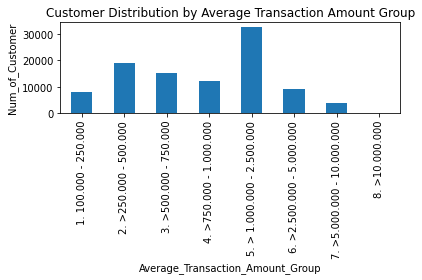

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=250000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '5. > 1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = '7. >5.000.000 - 10.000.000'
    else:
        val = '8. >10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

In [ ]:
#Missing Number
a = [1,10,8,9,6]
b = [1,9,6,10]
x = len(a)
y = len(b)

def find_missing_num(a,b,x,y):
    for i in range(x):
        for j in range(y):
            if(a[i] == b[j]):
                break
            elif(j == y-1):
                 print(a[i])

find_missing_num(a,b,x,y)

8


In [ ]:
#Random Matrix
import numpy as np
import random

n = random.randint(0,10)
a = np.random.randint(1,10,size=(3,3))
b = np.random.randint(1,10,size=(3,3))
result = np.zeros((3,3))
c = a.dot(b)
print(c)
print()
d = a+b
print(d)
print()
e = a-b
print(e)
print()
f = np.divide(a,b)
print(f)
g = a*n
print(g)

[[ 97 113  66]
 [102 100  99]
 [ 75  71  72]]

[[16 10  8]
 [12 11 18]
 [ 7  9 11]]

[[ 2 -8  2]
 [-6 -3  0]
 [-3 -1 -1]]

[[1.28571429 0.11111111 1.66666667]
 [0.33333333 0.57142857 1.        ]
 [0.4        0.8        0.83333333]]
[[54  6 30]
 [18 24 54]
 [12 24 30]]


In [ ]:
#Selected Menu with *
option  = ['option 0','option 1', 'option 2', 'option 3']
menu_option = int(input('Masukkan kode makanan : '))

def cek(a):
    if menu_option == a :
        x = '[*]'
    else:
        x = '[ ]'
    return x
for count, ele in enumerate(option):
    print(cek(count), " ", option[count])

Masukkan kode makanan : 3
[ ]   option 0
[ ]   option 1
[ ]   option 2
[*]   option 3


In [ ]:
#Tabel Perkalian
n = 20
for i in range(1,n+1):
    print("\t" + str(i), end=" ")
print()
for j in range(1,n+1):
    print(j, end="\t")
    for k in range(1,n+1):
        print(j*k if j <= k else " ",end="\t")
        if k % n == 0:
            print()

	1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 
1	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	
2	 	4	6	8	10	12	14	16	18	20	22	24	26	28	30	32	34	36	38	40	
3	 	 	9	12	15	18	21	24	27	30	33	36	39	42	45	48	51	54	57	60	
4	 	 	 	16	20	24	28	32	36	40	44	48	52	56	60	64	68	72	76	80	
5	 	 	 	 	25	30	35	40	45	50	55	60	65	70	75	80	85	90	95	100	
6	 	 	 	 	 	36	42	48	54	60	66	72	78	84	90	96	102	108	114	120	
7	 	 	 	 	 	 	49	56	63	70	77	84	91	98	105	112	119	126	133	140	
8	 	 	 	 	 	 	 	64	72	80	88	96	104	112	120	128	136	144	152	160	
9	 	 	 	 	 	 	 	 	81	90	99	108	117	126	135	144	153	162	171	180	
10	 	 	 	 	 	 	 	 	 	100	110	120	130	140	150	160	170	180	190	200	
11	 	 	 	 	 	 	 	 	 	 	121	132	143	154	165	176	187	198	209	220	
12	 	 	 	 	 	 	 	 	 	 	 	144	156	168	180	192	204	216	228	240	
13	 	 	 	 	 	 	 	 	 	 	 	 	169	182	195	208	221	234	247	260	
14	 	 	 	 	 	 	 	 	 	 	 	 	 	196	210	224	238	252	266	280	
15	 	 	 	 	 	 	 	 	 	 	 	 	 	 	225	240	255	270	285	300	
16	 	 	 	 	 	 	 

In [ ]:
# Python3 program to find two Missing Numbers using O(n)
# extra space

# Function to find two missing numbers in range
# [1, n]. This function assumes that size of array
# is n-2 and all array elements are distinct
def findTwoMissingNumbers(arr, n):
    # Create a boolean vector of size n+1 and
    # mark all present elements of arr[] in it.
    mark = [False for i in range(n + 1)]
    for i in range(0, n - 2, 1):
        mark[arr[i]] = True

    # Print two unmarked elements
    print("Two Missing Numbers are")
    for i in range(1, n + 1, 1):
        if (mark[i] == False):
            print(i, end=" ")

    print("\n")


# Driver program to test above function
if __name__ == '__main__':
    arr = [1,3,5,6 ]

    # Range of numbers is 2 plus size of array
    n = 2 + len(arr)

    findTwoMissingNumbers(arr, n);


Two Missing Numbers are
2 4 



In [ ]:
#Coba Array
import array as arr
a = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
b = arr.array('i', a)
print(b[4:7])
print(b[2:])
print(b[::2])
print(b[:-3])

array('i', [10, 12, 14])
array('i', [6, 8, 10, 12, 14, 16, 18, 20])
array('i', [2, 6, 10, 14, 18])
array('i', [2, 4, 6, 8, 10, 12, 14])


In [ ]:
#contoh Dict
#contoh mengambil max dan min value dari dict
data = {'indira':{'C1':70,'C2':52,'C3':80,'C4':60},
        'roni':{'C1':50,'C2':60,'C3':82,'C4':70},
        'putri':{'C1':85,'C2':55,'C3':80,'C4':75},
        'dani':{'C1':82,'C2':70,'C3':65,'C4':85},
        'ratna':{'C1':75,'C2':75,'C3':85,'C4':74},
        'mira':{'C1':62,'C2':50,'C3':75,'C4':80}}
#cara 1 declare tiap keys dengan var
list_nama = data.keys()
C1 = [data[i]['C1']for i in list_nama]
C2 = [data[i]['C2'] for i in list_nama]
C3 =  [data[i]['C3'] for i in list_nama]
C4 = [data[i]['C4'] for i in list_nama]

#count untuk melihat apakah ada duplikasi nilai dari min dan max
print(max(C1), min(C1), C1.count(min(C1)), C1.count(max(C1)))
print(max(C2), min(C2),C2.count(min(C2)), C2.count(max(C2)))
print(max(C3), min(C3),C3.count(min(C3)), C3.count(max(C3)))
print(max(C4), min(C4),C4.count(min(C4)), C4.count(max(C4)))

#cara 2 merupakan comprehension dict dengan looping tanpa declare var
result = {key:[method([value[key] for value in data.values()]) for method in (min,max)]for key in ('C1','C2','C3','C4')}
print(result)

#cara 3 menggunakan sort
c1 = sorted(C1)
c2 = sorted(C2)
c3 = sorted(C3)
c4 = sorted(C4)
print(c1[-1], c1[0])
print(c2[-1],c2[0])
print(c3[-1],c3[0])
print(c4[-1],c4[0])

In [ ]:
#contoh request
import requests
from contextlib import closing
import csv

url = "https://storage.googleapis.com/dqlab-dataset/penduduk_gender_head.csv"
with closing(requests.get(url, stream=True)) as r:
    f = (line.decode('utf-8') for line in r.iter_lines())

    reader = csv.reader(f, delimiter=",")

    for row in reader:
        print(row)

In [ ]:
#mengganti isi teks string
teks = "matematika"

#cara 1
print(*[value if index % 2 == 0 else "*" for (index,value) in enumerate(teks)], sep='')

#cara 2
teks = str().join([value if index % 2 == 0 else "*" for (index,value) in enumerate(teks)])
print(teks)

#cara 3
import re
teks =  re.sub('(1)', r'\1*', teks)
print(teks)

m*t*m*t*k*
m*t*m*t*k*
m*t*m*t*k*


In [ ]:
#OOP karyawan dan pengeluaran PT
# Definisikan class Karyawan sebagai parent class
class Karyawan:
    def __init__(self, nama, usia, pendapatan, insentif_lembur):
        self.nama = nama
        self.usia = usia
        self.pendapatan = pendapatan
        self.pendapatan_tambahan = 0
        self.insentif_lembur = insentif_lembur
    def lembur(self):
        self.pendapatan_tambahan += self.insentif_lembur
    def tambahan_proyek(self,jumlah_tambahan):
        self.pendapatan_tambahan += jumlah_tambahan
    def total_pendapatan(self):
        return self.pendapatan + self.pendapatan_tambahan

# Definisikan class TenagaLepas sebagai child class dari class Karyawan
class TenagaLepas(Karyawan):
    def __init__(self, nama, usia, pendapatan):
        super().__init__(nama, usia, pendapatan, 0)
    def tambahan_proyek(self, nilai_proyek):
        self.pendapatan_tambahan += nilai_proyek * 0.01

# Definisikan class AnalisData sebagai child class dari class Karyawan
class AnalisData(Karyawan):
    def __init__(self, nama, usia = 21, pendapatan = 6500000,
                 insentif_lembur = 100000):
        super().__init__(nama, usia, pendapatan, insentif_lembur)

# Definisikan class IlmuwanData sebagai child class dari class Karyawan
class IlmuwanData(Karyawan):
    def __init__(self, nama, usia = 25, pendapatan = 12000000,
                 insentif_lembur = 150000):
        super().__init__(nama, usia, pendapatan,insentif_lembur)
    def tambahan_proyek(self, nilai_proyek):
        self.pendapatan_tambahan += 0.1 * nilai_proyek

# Definisikan class PembersihData sebagai child class dari class TenagaLepas
class PembersihData(TenagaLepas):
    def __init__(self, nama, usia, pendapatan = 4000000):
        super().__init__(nama, usia, pendapatan)

# Definisikan class DokumenterTeknis sebagai child class dari class TenagaLepas
class DokumenterTeknis(TenagaLepas):
    def __init__(self, nama, usia, pendapatan = 2500000):
        super().__init__(nama, usia, pendapatan)

# Definisikan class Perusahaan
class Perusahaan:
    def __init__(self, nama, alamat, nomor_telepon):
        self.nama = nama
        self.alamat = alamat
        self.nomor_telepon = nomor_telepon
        self.list_karyawan = []
    def aktifkan_karyawan(self, karyawan):
        self.list_karyawan.append(karyawan)
    def nonaktifkan_karyawan(self, nama_karyawan):
        karyawan_nonaktif = None
        for karyawan in self.list_karyawan:
            if karyawan.nama == nama_karyawan:
                karyawan_nonaktif = karyawan
                break
        if karyawan_nonaktif is not None:
            self.list_karyawan.remove(karyawan_nonaktif)
    def total_pengeluaran(self):
        pengeluaran = 0
        for karyawan in self.list_karyawan:
            pengeluaran += karyawan.total_pendapatan()
        return pengeluaran
    def cari_karyawan(self, nama_karyawan):
        for karyawan in self.list_karyawan:
            if karyawan.nama == nama_karyawan:
                return karyawan
        return None

# Create object karyawan sesuai dengan tugasnya masing-masing
# seperti yang dinyatakan dalam tabel.
ani = PembersihData('Ani', 25)
budi = DokumenterTeknis('Budi', 18)
cici = IlmuwanData('Cici')
didi = IlmuwanData('Didi', 32, 20000000)
efi = AnalisData('Efi')
febi = AnalisData('Febi', 28, 12000000)

# Create object perusahaan
perusahaan = Perusahaan('ABC','Jl. Jendral Sudirman, Blok 11', '(021) 95812XX')

# Aktifkan setiap karyawan yang telah didefinisikan
perusahaan.aktifkan_karyawan(ani)
perusahaan.aktifkan_karyawan(budi)
perusahaan.aktifkan_karyawan(cici)
perusahaan.aktifkan_karyawan(didi)
perusahaan.aktifkan_karyawan(efi)
perusahaan.aktifkan_karyawan(febi)

# Cetak keseluruhan total pengeluaran perusahaan
print(perusahaan.total_pengeluaran())

57000000


In [ ]:
#Matrix Diko
from random import randint

matrix_size = 3
matrix1 = [[0,0,0],
           [0,0,0],
           [0,0,0]]
matrix2 = [[0,0,0],
           [0,0,0],
           [0,0,0]]
for row in range(matrix_size):
    for col in range(matrix_size):
        matrix1[row][col] = randint(1,10)
        matrix2[row][col] = randint(1,10)
scale = randint(1,10)
result = [[0,0,0],
          [0,0,0],
          [0,0,0]]
print("Matrix 1:")
for r in matrix1:
    for c in r:
        print(c, end= " ")
    print()
print("\nMatrix 2:")
for r in matrix2:
    for c in r:
        print(c,end=" ")
    print()
print("\nPengali Matrix 1 = ", scale)
print("\nMAarix 1 + Matrix 2 = ")
for x in range(0,len(matrix1)):
    for y in range(0,(len(matrix2))):
        print(matrix1[x][y] + matrix2[x][y],end=" ")
    print()
print("\nMatrix 1 - Matrix 2 = ")
for x in range(0,len(matrix1)):
    for y in range(0,(len(matrix2))):
        print(matrix1[x][y] - matrix2[x][y],end=" ")
    print()
print("\nMatrix 1 x scale = ")
for x in range(0, len(matrix1)):
    for y in range(0,len(matrix1)):
        print(matrix1[x][y]*scale, end=" ")
    print()
print("\nMatrix 1 x Matrix 2 = ")
for x in range(len(matrix1)):
    for y in range(len(matrix2[0])):
        for k in range(len(matrix2)):
            result[x][y] += matrix1[x][k] * matrix2[k][y]
for i in result:
    print(r)

In [ ]:
import numpy as np
import random

n = random.randint(0,10)
a = np.random.randint(1,10,size=(3,3))
b = np.random.randint(1,10,size=(3,3))
result = np.zeros((3,3))
c = a.dot(b)
print(c)
print()
d = a+b
print(d)
print()
e = a-b
print(e)
print()
f = np.divide(a,b)
print(f)
g = a*n
print(g)

[[ 30  43  34]
 [ 49  69  55]
 [ 85 112  86]]

[[ 8 14 10]
 [ 7 11  7]
 [10  8  6]]

[[-6 -4 -4]
 [-1  1  1]
 [ 8  2 -2]]

[[0.14285714 0.55555556 0.42857143]
 [0.75       1.2        1.33333333]
 [9.         1.66666667 0.5       ]]
[[1 5 3]
 [3 6 4]
 [9 5 2]]


In [ ]:
#Contoh Data Manipulation --1
import pandas as pd

# 1. Baca dataset
print("[1] BACA DATASET")
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/retail_raw_test.csv", low_memory=False)
print("    Dataset:\n", df.head())
print("    Info:\n", df.info())

# 2. Ubah tipe data
print("\n[2] UBAH TIPE DATA")
df["customer_id"] = df["customer_id"].apply(lambda x: x.split("'")[1]).astype("int64")
df["quantity"] = df["quantity"].apply(lambda x: x.split("'")[1]).astype("int64")
df["item_price"] = df["item_price"].apply(lambda x: x.split("'")[1]).astype("int64")
print("    Tipe data:\n", df.dtypes)

# 3. Transform "product_value" supaya bentuknya seragam dengan format "PXXXX", assign ke kolom baru "product_id", dan drop kolom "product_value", jika terdapat nan gantilah dengan "unknown"
print("\n[3] TRANSFORM product_value MENJADI product_id")
# Buat fungsi
import math
def impute_product_value(val):
	if math.isnan(val):
		return "unknown"
	else:
		return 'P' + '{:0>4}'.format(str(val).split('.')[0])

# Buat kolom "product_id"
df["product_id"] = df["product_value"].apply(lambda x: impute_product_value(x))
# Hapus kolom "product_value"
df.drop(["product_value"], axis=1, inplace=True)
# Cetak 5 data teratas
print(df.head())

# 4. Tranform order_date menjadi value dengan format "YYYY-mm-dd"
print("\n[4] TRANSFORM order_date MENJADI FORMAT YYYY-mm-dd")
months_dict = {
   "Jan":"01",
   "Feb":"02",
   "Mar":"03",
   "Apr":"04",
   "May":"05",
   "Jun":"06",
   "Jul":"07",
   "Aug":"08",
   "Sep":"09",
   "Oct":"10",
   "Nov":"11",
   "Dec":"12"
}
df["order_date"] = pd.to_datetime(df["order_date"].apply(lambda x: str(x)[-4:] + "-" + months_dict[str(x)[:3]] + "-" + str(x)[4:7]))
print("    Tipe data:\n", df.dtypes)


# 5. Mengatasi data yang hilang di beberapa kolom
print("\n[5] HANDLING MISSING VALUE")
# Kolom "city" dan "province" masih memiliki missing value, nilai yang hilang di kedua kolom ini diisi saja dengan "unknown"
df[["city","province"]] = df[["city","province"]].fillna("unknown")
# Kolom brand juga masih memiliki missing value, Ganti value NaN menjadi "no_brand"
df["brand"] = df["brand"].fillna("no_brand")
# Cek apakah masih terdapat missing value di seluruh kolom 
print("    Info:\n", df.info())

# 6. Membuat kolom baru "city/province" dengan menggabungkan kolom "city" dan kolom "province" dan delete kolom asalnya
print("\n[6] MEMBUAT KOLOM BARU city/province")
df["city/province"] = df["city"] + "/" + df["province"]
# drop kolom "city" dan "province" karena telah digabungkan
df.drop(["city","province"], axis=1, inplace=True)
# Cetak 5 data teratas
print(df.head())

# 7. Membuat hierarchical index yang terdiri dari kolom "city/province", "order_date", "customer_id", "order_id", "product_id"
print("\n[7] MEMBUAT HIERACHICAL INDEX")
df = df.set_index(["city/province","order_date","customer_id","order_id","product_id"])
# urutkanlah berdasarkan index yang baru
df = df.sort_index()
# Cetak 5 data teratas
print(df.head())

# 8. Membuat kolom "total_price" yang formula nya perkalian antara kolom "quantity" dan kolom "item_price"
print("\n[8] MEMBUAT KOLOM total_price")
df["total_price"] = df["quantity"] * df["item_price"]
# Cetak 5 data teratas
print(df.head())

# 9. Slice dataset agar hanya terdapat data bulan Januari 2019
print("\n[9] SLICE DATASET UNTUK BULAN JANUARI 2019 SAJA")
idx = pd.IndexSlice
df_jan2019 = df.loc[idx[:, "2019-01-01":"2019-01-31"], :]
print("Dataset akhir:\n", df_jan2019)

# END OF PROJECT

[1] BACA DATASET
    Dataset:
    order_id    order_date customer_id           city     province    brand  \
0   1730350  Dec 11, 2019      '13447      Surakarta  Jawa Tengah  BRAND_F   
1   1677490  Jul 31, 2019          '0            NaN          NaN  BRAND_F   
2   1704211  Oct 18, 2019      '16128  Jakarta Pusat  DKI Jakarta  BRAND_H   
3   1679695  Aug 07, 2019      '16225     Yogyakarta   Yogyakarta  BRAND_H   
4   1679080  Aug 05, 2019          '0            NaN          NaN  BRAND_E   

  quantity item_price  product_value  
0      '24    '113000         1374.0  
1       '1   '1164000         1370.0  
2      '12    '747000         1679.0  
3       '6    '590000         1708.0  
4       '2    '740000         1201.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       5000 non-null   int64  
 1   order_date     5000 non

In [ ]:
#Contoh super()

class monster:
    def __init__(self,name,health):
        self.name = name
        self.health = health
    def showinfo(self):
        print("monster %s health %i" %(self.name,self.health)) #or use below this
       #print("monster {} health{}".format(self.name,self.health)) 
class monsterdarat(monster):
    def __init__(self,name):
        super().__init__(name,100)
        super().showinfo()
class monsterair(monster):
    def __init__(self,name):
        super().__init__(name,150)
        super().showinfo()
        
slark = monsterair("slark")
axe = monsterdarat("axe")

monster slark health 150
monster axe health 100


In [ ]:
#Contoh Encapulasi
class Hero:
    __jumlah = 0
    def __init__(self,InputNama,InputHp,InputAtt):
        self.__name = InputNama
        self.__hp   = InputHp
        self.__att  = InputAtt
        
    def info(self): #getter to access private variable
        print(self.__name)
        print(self.__hp)
        print(self.__att)
    
    def levelup(self):
        self.__hp += 100
        self.__att += 12

slark = Hero("slark",600,65)
print(slark.info())
slark.levelup()
print("\n")
print(slark.info())

slark
600
65
None


slark
700
77
None


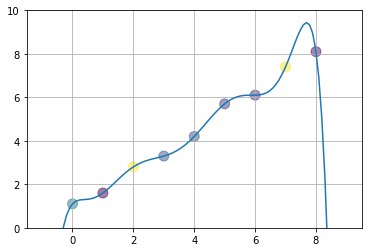

In [ ]:
#contoh grafik dengan dot
import matplotlib.pyplot as plt
import numpy as np

x = [0., 1., 2., 3., 4., 5., 6., 7., 8.]
y = [ 1.1, 1.6, 2.8, 3.3, 4.2, 5.7, 6.1, 7.4, 8.1]
n = len(x)
def L(i,t):
    p = 1
    for j in range (n):
        if (j!=i):
            p = p* (t-x[j])/(x[i]-x[j])
    return p
def f(t):
    global x,y
    s = 0
    for i in range (n):
        s = s + L(i,t) * y[i]
    return s
t = np.linspace(-1,9,100)
z = f(t)
plt.grid(True)
plt.ylim(0,10)
plt.plot(t,z)
plt.scatter(x,y ,s=100, c=np.random.rand(n), alpha= 0.5)
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

x = df[feature_columns] 
y = df['is_churn'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

ValueError: ignored

In [ ]:
#Contoh Class
class Hero:
    jumlah = 0 #jumlah adalah class variable
    #Public variable bisa diakses siapapun
    def __init__(self,InputNama,InputHp,InputAtt): #self.xxxx adalah instance variable
        self.name = InputNama
        self.hp   = InputHp
        self.att  = InputAtt
        Hero.jumlah += 1
        
        #protected dapat diakses namun terbatas
        self._tinggi = 100
        #private variable
        self.__exp = 100
        
    def status(self): #void function, method tanpa return
        print("hero statuses are :",self.name,self.hp,self.att,sep="\n")
        print(" ")

    def tambah_darah(self,up): #method dengan argumen, tanpa return
        self.hp += up
    
    def getExp(self): #method memanggil private variable
        print(self.__exp)
        
    def killUnit(self): #penambahan exp setelah kill unit
        self.__exp += 200
        
#hero_y adalah objek yang dibuat
hero_1 = Hero('od',1000, 62)
hero_2 = Hero('wr',750,58)
hero_3 = Hero('arc',800,66)

#pemanggilan objek dengan method
hero_1.tambah_darah(250) # hero_1 akan bertambah darah sebesar 250 hp
hero_1.status()
hero_2.status()
hero_3.status()
print("jumlah seluruh hero adalah",Hero.jumlah)
print("initial hero's exp: ")
hero_1.getExp()
hero_2.getExp()
hero_3.getExp()
print("setelah kill unit : ")
hero_1.killUnit()
hero_1.getExp()

In [ ]:
#Contoh Staticmethod
class Hero:
    __jumlah = 0
    def __init__(self,InputNama,InputHp,InputAtt):
        self.__name = InputNama
        self.__hp   = InputHp
        self.__att  = InputAtt
        
    def info(self): #getter to access private variable
        print(self.__name)
        print(self.__hp)
        print(self.__att)
    
    def getjumlah(self): #hanya berlaku untuk objek
        return Hero.__jumlah
    def getjumlah1(): #hanya berlaku untuk class
       return Hero.__jumlah
    @staticmethod #berlaku untuk objek dan class namun static
    def berapa():
      return Hero.__jumlah
    
    @classmethod #berlaku untuk objek dan class, bersifat dinamis
    def berapa1(cls):
        return cls.__jumlah
    
print(Hero.berapa())
print(Hero.berapa1())

In [ ]:
#Latihan Class
class Hero:
    def __init__(self,name,hp,att,armor,level):
        self.name = name
        self.hp = hp
        self.att = att
        self.armor = armor
        
        self.xp = 0
        self.level = level
    def info(self):
        print(self.name)
        print(self.hp)
        print(self.att)
        print(self.armor)
        print(self.level)
    def killunit(self):
        self.xp += 100
        
    def serang(self,enemy):
        print(self.name + " menyerang " + enemy.name)
        enemy.diserang(self)
        self.killunit()
        self.levelup()
        print("\n")
        print(self.info())
        
    def diserang(self,enemy):
        print(self.name + " diserang " + enemy.name)
        while self.hp >= 0 :
            self.hp -= enemy.att
            print("hp ursa tersisa " + str(self.hp))
        print(self.name+ " is dead")
        #print("hp ursa tersisa " + str(self.hp))
        #if self.hp == 0:
         #   print("ursa is dead")
         #   return enemy.killunit()
        
    def level1(self):
        while self.xp>=100:
            print(self.levelup())
            break
    def levelup(self):
        self.hp += 125
        self.att += 10
        self.armor += 2
        self.level += 1
        
hero1 = Hero("slark",800,66,4,0)
hero2 = Hero("ursa",800,54,3,0)
print(hero1.serang(hero2))

Data (5 teratas):
 pollutant                   bc   co  no2   o3  pm10  pm25  so2
timestamp                                                     
2014-05-13 03:00:00+00:00  0.0  0.0  0.0  0.0   0.0   9.7  0.0
2014-08-12 20:00:00+00:00  0.0  0.0  0.0  0.0   0.0   7.1  0.0
2015-04-15 00:00:00+00:00  0.0  0.0  0.0  0.0   0.0  18.1  0.0
2015-08-21 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0  36.9  0.0
2015-09-13 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0   8.8  0.0


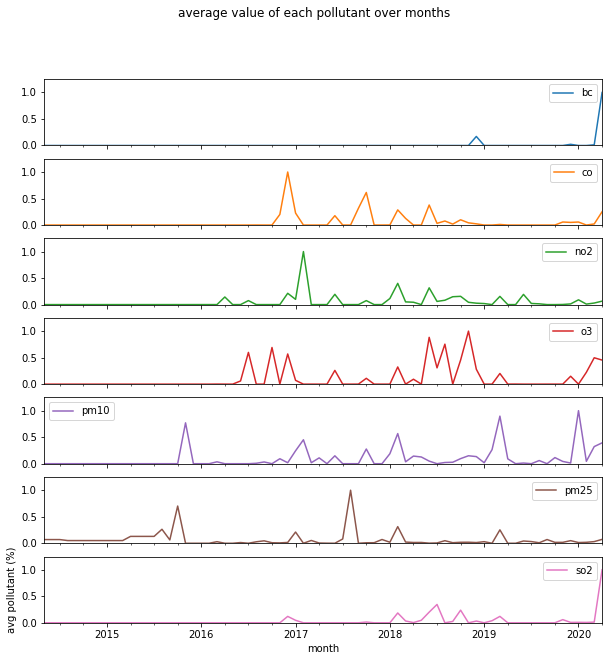

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# [1] Membuat pivot table yang menunjukkan waktu di baris nya dan masing-masing value dari pollutant nya dalam kolom
gaq_viz = gaq[['pollutant','value']].reset_index().set_index(['pollutant','timestamp'])
gaq_viz = gaq_viz.pivot_table(index='timestamp', columns='pollutant', aggfunc='mean').fillna(0)
gaq_viz.columns = gaq_viz.columns.droplevel(0)
print('Data (5 teratas):\n', gaq_viz.head())
# [2] Membuat fungsi yang memberikan default value 0 ketika value nya di bawah 0 dan apply ke setiap elemen dari dataset tersebut, kemudian menampilkannya sebagai chart
def default_val(val):
 if val < 0:
   return 0
 else:
   return val
line1 = gaq_viz.resample('M').mean().ffill().applymap(lambda x: default_val(x)).apply(lambda x: x/x.max()) # default value if value < 0 then 0, kemudian menghasilkan % value = value/max(value)
line1.plot(
   title = 'average value of each pollutant over months',
   figsize = (10,10), #ukuran canvas 10px x 10px
   ylim = (0,1.25), #memberikan batas tampilan y-axis hanya 0 sampai 125%
   subplots = True #memecah plot menjadi beberapa bagian sesuai dengan jumlah kolom
)
plt.ylabel('avg pollutant (%)')
plt.xlabel('month')
plt.show()

<Figure size 432x288 with 0 Axes>

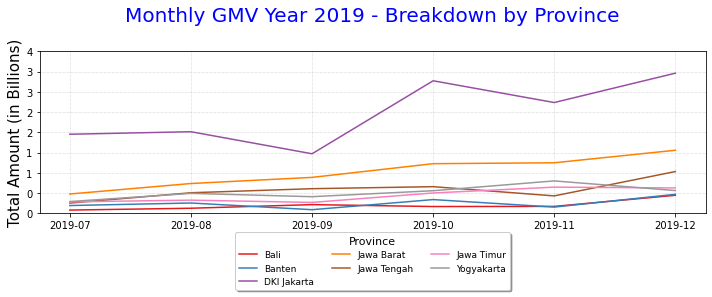

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30,fontsize=20,color='blue')
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray',linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.5),shadow=True,ncol=3,title='Province',fontsize=9,title_fontsize=11)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


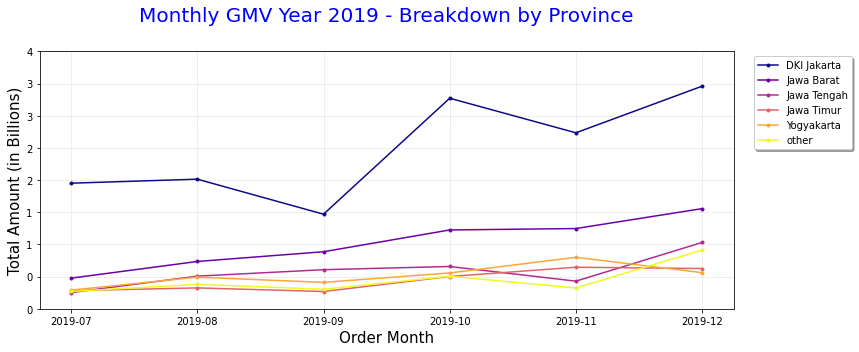

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if(x in top_provinces['province'].to_list()) else 'other')

# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.',cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center',pad=30,fontsize=20,color='blue')
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray',linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
labels,locations= plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1,1),shadow=True,ncol=1)
plt.gcf().set_size_inches(12,5)
plt.tight_layout()
plt.show()

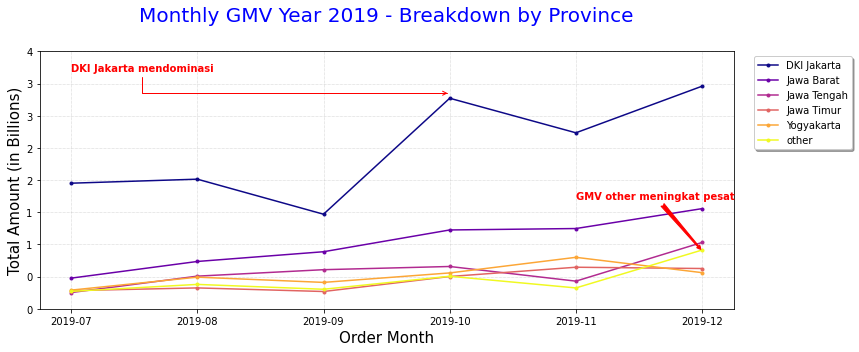

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat',xy=(5,900000000),
			 xytext=(4,1700000000),weight='bold',color='red',
			 arrowprops=dict(arrowstyle='fancy',
						connectionstyle='arc3',
						color='red'))

# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi',xy=(3,3350000000),
			 xytext=(0,3700000000),
			 weight='bold',color='red',
			 arrowprops=dict(arrowstyle='->',
							 connectionstyle='angle',
							 color='red'))


plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

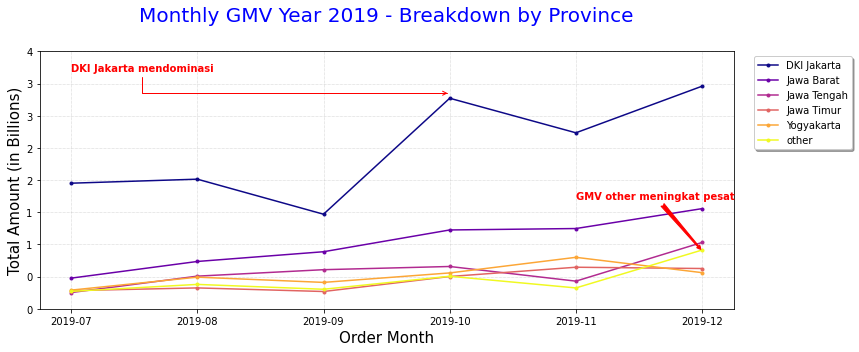

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000), 
             xytext=(4, 1700000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='fancy',
                             connectionstyle="arc3",
                             color='red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000), 
             xytext=(0, 3700000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="angle",
                             color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

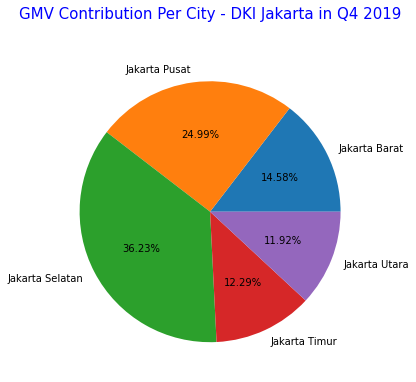

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'],labels=gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center',pad=30,fontsize=15,color='blue')
plt.show()

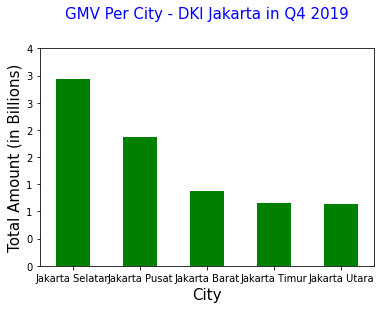

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar',color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019',loc='center',pad=30,fontsize=15,color='blue')
plt.xlabel('City',fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.ylim(ymin=0)
labels,locations= plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019',loc='center',pad=30,fontsize=15,color='blue')
plt.xlabel('Province',fontsize=12)
plt.ylabel('Total Amount (in Billions)',fontsize=12)
plt.legend(bbox_to_anchor=(1,1),shadow=True,title='Month')
plt.ylim(ymin=0)
labels,locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

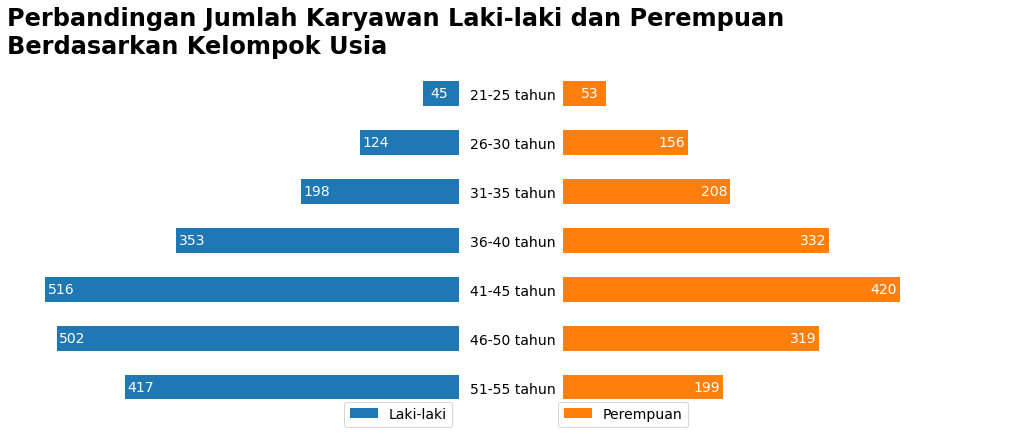

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tabel = (pd.read_csv("https://storage.googleapis.com/dqlab-dataset/usia_karyawan.csv")
           .sort_values("Kelompok Usia", ascending=False)
           .set_index("Kelompok Usia")
         )
tabel["Laki-laki"] = -tabel["Laki-laki"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Perbandingan Jumlah Karyawan Laki-laki dan Perempuan\nBerdasarkan Kelompok Usia", 
             x=0., y=1.0, fontsize=24, fontweight="bold", ha="left")
tabel["Laki-laki"].plot(kind="barh", ax=axes[0], color="tab:blue", xlim=[-550, 0])
tabel["Perempuan"].plot(kind="barh", ax=axes[1], color="tab:orange", fontsize=14, xlim=[0, 550])
axes[0].set_ylabel("")
axes[0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axes[0].legend(["Laki-laki"], fontsize=14, bbox_to_anchor=(0., 0., 1., .05))
axes[0].set_frame_on(False)
axes[1].set_ylabel("")
axes[1].tick_params(left=False, bottom=False, labelbottom=False)
axes[1].legend(["Perempuan"], fontsize=14, bbox_to_anchor=(0., 0., 0.3, .05))
axes[1].set_frame_on(False)
for i, m, w in zip(range(tabel.shape[0]), list(tabel["Laki-laki"]), list(tabel["Perempuan"])):
    axes[0].annotate(str(abs(m)), (m+20, i), xytext=(m+20, i), 
                     color="w", va="center", ha="center", fontsize=14)
    axes[1].annotate(str(abs(w)), (w-20, i), xytext=(w-20, i), 
                     color="w", va="center", ha="center", fontsize=14)
plt.tight_layout(rect=(0,0,1,0.88))
plt.show()

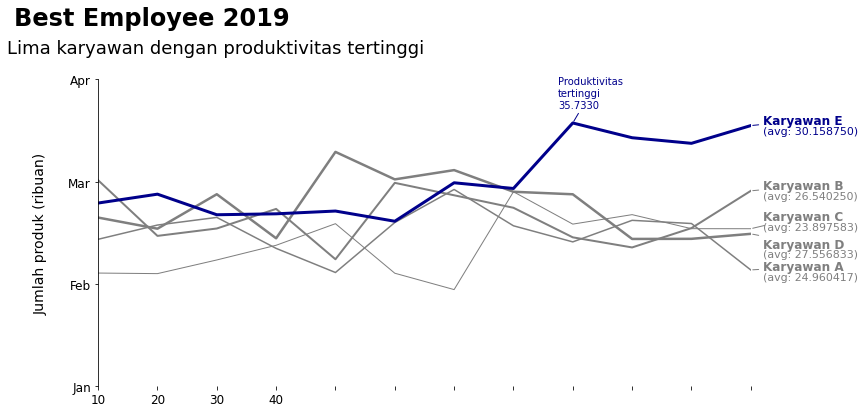

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tabel = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/produktivitas_karyawan.csv', index_col = 'Bulan') / 1000

fig, ax = plt.subplots(1,1,figsize=(12,6))
fig.suptitle('Best Employee 2019', x=0.01, y=0.95, fontsize=24, fontweight='bold',ha='left')
ax.set_title("Lima karyawan dengan produktivitas tertinggi\n", fontsize=18, ha='right')

colors = ['tab:gray', 'tab:gray','tab:gray','tab:gray','darkblue']
line_width = [1.5,2,1,2.5,3.]
lp = tabel.plot(kind='line', ax=ax, xlim=[0,11],ylim=[10,40],color=colors,
			   xticks=range(tabel.shape[0]), yticks=[10,20,30,40])

add_lbl_pos = [0.3,0.5,1.2,-1.0,0.5]
add_avg_pos = [-0.7,-0.5,0.2,-2.0,-0.5]
for i, item in enumerate(lp.get_lines()):
	item.set_linewidth(line_width[i])
	lbl = item.get_label()
	ax.annotate(lbl,(11, tabel.loc['Desember',lbl]),
			   (11.2,tabel.loc['Desember', lbl] + add_lbl_pos[i]),
			   fontweight='bold',fontsize=12,color=colors[i], va='center',arrowprops={'arrowstyle':'-','color':colors[i]})
	ax.annotate('(avg: %4f)' % tabel[lbl].mean(),(11,tabel.loc['Desember',lbl]),
			   (11.2,tabel.loc['Desember',lbl] + add_avg_pos[i]),
			   fontsize=11, color=colors[i], va='center')
highest_prod = tabel['Karyawan E'].max()
ax.annotate('Produktivitas\ntertinggi\n%.4f'%highest_prod,
		   (8,highest_prod),(7.75,highest_prod + 1.5),
		   ha='left',color=colors[-1],arrowprops={'arrowstyle':'-','color':colors[-1]})
ax.set_yticklabels([item[:3] for item in tabel.index], fontsize=12)
ax.set_xticklabels([str(i) for i in [10,20,30,40]], fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah produk (ribuan)\n', fontsize=14)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.get_legend().remove()
plt.tight_layout(rect=(0,0,1,0.90))
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

import matplotlib.pyplot as plt

plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

x = np.array([2, 2, 2, 3, 4, 4, 5, 5, 5, 5, 7])

vals, counts = np.unique(x, return_counts=True)

mode_value = np.argwhere(counts == np.max(counts))

print(vals[mode_value].flatten().tolist())
print(np.max(counts))


[5]
4


In [ ]:
#RUMAH TENOR 25THN
gaji = 20000000
harga =  gaji/3 * (((1.00417)**(300))-1)/((0.00417)*((1.00417)**300))
print(harga)

1139945821.0029774


In [ ]:
import math
print('3.	 Hitunglah berapa hasil dari √175 + 4√7 + (1/3) + ³log 81 menggunakan module math!')
kal = math.sqrt(175) + 4 * math.sqrt(7) + 1/3 + math.log(81,3)
print(kal)


3.	 Hitunglah berapa hasil dari √175 + 4√7 + (1/3) + ³log 81 menggunakan module math!
28.145095132914648


In [ ]:
#GUI NILAI
import tkinter as tk
import tkinter.messagebox as mbox

class application(tk.Frame):

    def __init__(self, master=None):
        '''init aplikasi'''

        tk.Frame.__init__(self,master)

        #declare variable yang akan diproses
        #presensi
        self.presEnt = tk.StringVar()
        self.presCalc = tk.StringVar()
        #tugas
        self.tugasEnt = tk.StringVar()
        self.tugasCalc = tk.StringVar()
        #uts
        self.utsEnt = tk.StringVar()
        self.utsCalc = tk.StringVar()
        #uas
        self.uasEnt = tk.StringVar()
        self.uasCalc = tk.StringVar()
        #total and grade
        self.totalCalc = tk.StringVar()
        self.gradeCalc = tk.StringVar()

        #pasang frame utama
        self.grid()
        #----------
        #layout tampilan

        #label judul
        curRow = 1
        tk.Label(self, text="Hitung Rataan Nilai", pady = 20)\
            .grid(row = curRow, column = 0, columnspan =4)

        #presensi
        curRow += 1
        tk.Label(self, text="Presensi").grid(row = curRow)
        tk.Entry(self, width = 10, textvariable = self.presEnt)\
            .grid(row = curRow, column = 1)
        tk.Label(self,text='10%').grid(row = curRow, column = 2)
        tk.Entry(self, width = 10, state=tk.DISABLED,
            justify=tk.RIGHT, textvariable = self.presCalc)\
            .grid(row = curRow, column = 3)

        #tugas
        curRow += 1
        tk.Label(self,text='Tugas').grid(row = curRow)
        tk.Entry(self,width = 10,
             justify=tk.RIGHT, textvariable = self.tugasEnt)\
            .grid(row=curRow, column = 1)
        tk.Label(self, text='30%').grid(row=curRow,column = 2)
        tk.Entry(self, width=10, state=tk.DISABLED,
                 justify=tk.RIGHT, textvariable=self.tugasCalc) \
            .grid(row=curRow, column=3)
        #uts
        curRow += 1
        tk.Label(self, text='UTS').grid(row=curRow)
        tk.Entry(self, width=10,
                 justify=tk.RIGHT, textvariable=self.utsEnt) \
            .grid(row=curRow, column=1)
        tk.Label(self, text='30%').grid(row=curRow, column=2)
        tk.Entry(self, width=10, state=tk.DISABLED,
                 justify=tk.RIGHT, textvariable=self.utsCalc) \
            .grid(row=curRow, column=3)
        #uas
        curRow += 1
        tk.Label(self, text='UAS').grid(row=curRow)
        tk.Entry(self, width=10,
                 justify=tk.RIGHT, textvariable=self.uasEnt) \
            .grid(row=curRow, column=1)
        tk.Label(self, text='30%').grid(row=curRow, column=2)
        tk.Entry(self, width=10, state=tk.DISABLED,
                 justify=tk.RIGHT, textvariable=self.uasCalc) \
            .grid(row=curRow, column=3)

        #ringkasan total dan grade
        curRow += 1
        tk.Label(self, text="Total Nilai").grid(row= curRow,column = 2)
        tk.Entry(self, width =10, state=tk.DISABLED,
                 justify=tk.RIGHT, textvariable= self.totalCalc)\
            .grid(row=curRow, column = 3)

        curRow += 1
        tk.Label(self, text="Grade").grid(row=curRow, column= 2)
        tk.Entry(self, width =10, state=tk.DISABLED,
                 justify=tk.RIGHT,textvariable=self.gradeCalc)\
            .grid(row = curRow, column = 3)

        curRow += 1
        butframe = tk.Frame(self,pady=20)
        tk.Button(butframe, text="Hitung", command=self.calc)\
            .grid(row= curRow, column= 0)
        tk.Button(butframe, text="Hapus", command=self.clear) \
            .grid(row=curRow, column = 1)
        tk.Button(butframe, text="Keluar", command=self.quit) \
            .grid(row=curRow, column = 2)
        butframe.grid(row=curRow, column = 0 , columnspan = 4)

    def calc(self):
        '''Hitung total dan grade'''

        try:
            presn = 100/16 * int(self.presEnt.get())
            tugas = 0.3 * int(self.tugasEnt.get())
            uts = 0.3 * int(self.utsEnt.get())
            uas = 0.3 * int(self.uasEnt.get())

            assert 0 <= presn <= 10
            assert 0 <= tugas <= 30
            assert 0 <= uts <= 30
            assert 0 <= uas <= 30

        except:
            mbox.showerror("Error, Entry dengan angka 1-100")
        else:
            total = presn + tugas + uts + uas
            if total< 40:
                grade = "E"
            elif total < 50:
                grade = "D"
            elif total < 55:
                grade = "C-"
            elif total < 60:
                grade = "C"
            elif total < 65:
                grade = "C+"
            elif total < 70:
                grade = "B-"
            elif total < 75:
                grade = "B"
            elif total < 80:
                grade = "B+"
            elif total < 85:
                grade = "A-"
            else:
                grade = "A"
            self.presCalc.set(f'{presn:.2f}')
            self.tugasCalc.set(f'{tugas:.2f}')
            self.utsCalc.set(f'{uts:.2f}')
            self.uasCalc.set(f'{uas:.2f}')
            
            self.totalCalc.set(f'{total:.2f}')
            self.gradeCalc.set(grade)
            
    def clear(self):
        '''Hapus Entrian kembali blank'''
        if mbox.askyesno('Confirm', 'Hapus Entrian?'):
            self.presEnt.set(' ')
            self.presCalc.set(' ')
            self.tugasEnt.set(' ')
            self.tugasCalc.set(' ')
            self.utsEnt.set(' ')
            self.utsCalc.set(' ')
            self.uasEnt.set(' ')
            self.uasCalc.set(' ')
            self.totalCalc.set(' ')
            self.gradeCalc.set(' ')

    def quit(self):
        '''override quit'''
        if mbox.askyesno('Confirm', 'Keluar dari Program? '):
            super().quit()
            
if __name__ == '__main__':
    app = application()
    app.master.title("Hitung Rataan Nilai")
    app.mainloop()

TclError: ignored

In [ ]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv')
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

##import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train,y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)
print(y_pred)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)
[ 0.34083988  0.62785235  0.22378999  0.32028992  0.46098396  0.28196257
  0.14847149  0.33493705  0.40340497  0.29019996  0.23851075  0.27404748
  0.39970751 -0.0569409   0.41473884  0.22575895  0.39146294  0.55410254
  0.30230399  0.59603159  0.62188339  0.5961778  -0.09762833  0.37821
  0.27798734  0.70632464  0.66297372  0.70628419  0.35416061  0.34527025
  0.29714003  0.38808243  0.39911196  0.62707172  0.38276844  0.72212145
  0.45207908  0.17033629  0.43289903  0.52743265  0.23877368  0.37782293
  0.32148831  0.4276086   0.19062406  0.28319417  0.45748909  0.27891675
  0.66513932  0.32879408  0.62501302  0.37054543  0.55435201  0.2986063
  0.6048286   0.52165302  0.27343951  0.22742457  0.41394101  0.36593367
  0.38139206  0.28533119  0.33357687  0.33383548  0.30437093  0.27629627
  0.14072929  0.48680909  0.51585774  0.22613048 -0.043

Mean squared error of testing set: 0.010913024655841009
Mean absolute error of testing set: 0.0778989610312069
Root Mean Squared Error of testing set: 0.1044654232549747
Training Accuracy : 0.7343049403294957
Testing Accuracy : 0.6817814124380089


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


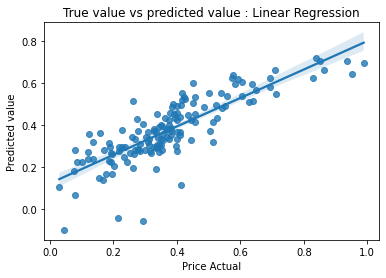

In [ ]:
import pandas as pd
housing = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv')

from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)
#Evaluasi
print('Training Accuracy :', reg.score(X_train,y_train))
print('Testing Accuracy :', reg.score(X_test,y_test))
#Plotting y_test dan y_pred
sns.regplot(y_test,y_pred)
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

In [ ]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train,y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X_train,y_train))
print('Testing Accuracy :', decision_tree.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Training Accuracy : 1.0
Testing Accuracy : 0.8583400919167342


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MariBisnis.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y%m%d"))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [ ]:
df.drop(columns=['id','long','lat','waterfront','date','view','yr_renovated','zipcode'],inplace=True)

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,2009,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,2014,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,2009,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,2004,1410,1287


In [ ]:
df = pd.read_csv('/content/student-por.csv')

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
